In [1]:
# importing standard libraries
import os
import sys

# setting path
gparent = os.path.join(os.pardir)
sys.path.append(gparent)

# importing 3rd party libraries
from graphviz import Graph
import matplotlib as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Graph object
now = Graph('Current Pipeline', format='png')

# nodes
now.node('A', 'Data Source')
now.node('B', 'Power BI')
now.node('C', 'CSV')
now.node('D', 'Python Scripts')
now.node('E', 'Word Report')

# edges
now.edges(['AB', 'BC', 'CD', 'DE'])

# path
path = os.path.join(gparent,'figures', 'current_pipeline')

# chart
now.render(path)

'../figures/current_pipeline.png'

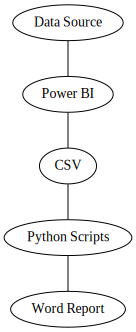

In [3]:
now

In [4]:
trans = Graph('Transition Pipeline', format='png')

# nodes
trans.node('A', 'Data Source')
trans.node('B', 'Power BI')
trans.node('C', 'Python Scripts')
trans.node('D', 'CSV')
trans.node('E', 'Python Scripts')
trans.node('F', 'Tableau Dashboard')

# edges
trans.edges(['AB', 'BC', 'CD', 'DE', 'EF'])

# path
path = os.path.join(gparent,'figures', 'transition_pipeline')

# chart
trans.render(path)

'../figures/transition_pipeline.png'

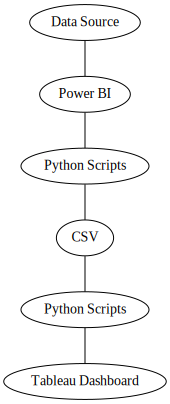

In [5]:
trans

In [6]:
final = Graph('Final Pipeline', format='png')

# nodes
final.node('A', 'Salesforce')
final.node('B', 'Python Scripts')
final.node('C', 'Tableau Dashboard')

# edges
final.edges(['AB', 'BC'])

# path
path = os.path.join(gparent, 'figures', 'final_pipeline')

# chart
final.render(path)

'../figures/final_pipeline.png'

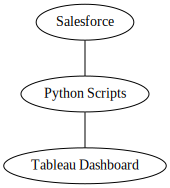

In [7]:
final